# Advanced Algorithmic : Deliverable 1

Group 1 : Bruno Tom, Bruno Jean-Vincent, Silva Roriz Catarina, Tarte Antoine

## Introduction

L'ADEME (Environment and Energy Management Agency) recently launched a call to promote the production of demonstrators and experiments for new mobility solutions for people and goods transport depending on the territories.We decide to respond to the ADEME's call and work on a solution for managing delivery rounds.

The algorithm will calculate the shortest path for traveling between a set of cities, then come back to the starting point. This algorithm will include some constrain like :
* The traffic between cities will depend on the time of the day
* The number of trucks
* Specific place to collect some objects
* Time frame to deliver some objects

In this document we are going to study our problem and determine its complexity before developing it.

First we are going to define precisely what is our problem and its different constrain. After that we are going to study the complexity of our problem with and without its constrains. Then we are going to talk about how we are going to present our graph data for the algorithm. Finaly, we are going to talk about the optimisation that we plan to do with the algorithm.

## Problem presentation

During this study we will first present our basic algorithm in the simplest way, i.e., the delivery truck passes through each city only once.

This algorithm will have a set of vertex that will be linked together. The algorithm will have for mission to connect a subset of vertex which will correspond to the cities concerned by a delivery passing by the shortest way and while returning to its starting point.

For our initial algorithm the problem is therefore :
> What is the shortest cycle passing only once through each vertex of the list L in G?

Then, we will add some constraints:
- Time limit for the delivery of each object 
    * with delivery forbidden if outside this window 
    * or waiting time for the window to open
- Simultaneous delivery with k trucks.
    * Capacity of the trucks (2 or 3 sizes) and the size of the objects
    * Some objects can only be delivered by certain trucks
- Each object has a specific collection location
- Consideration of road traffic (travel time) by varying the length of the stops

## Study of the complexity of the problem

### Problem 1 : Delivery rounds management

> __Delivery rounds management__
> 
> Data: A complete graph G edge-valued, a list of vertexes L
> 
> Question : What is the shortest cycle passing only once through each vertex of the list L in G ?

Here we will try to determine if the problem __Delivery rounds management__ is in __NP-Difficult__. For that we will prove that its decision problem of __Delivery rounds management__ is in __NP-Complete__.

1. __Study of the decision problem__

First of all, we start by defining what our decision problem is:

> __Verification of delivery rounds management__
> 
> Data: A complete edge-valued graph G, a list of vertexes L, an integer k
> 
> Question : Is there a cycle passing only once through each vertex of the list L in G and whose sum of the values of the edges its maximum k ?

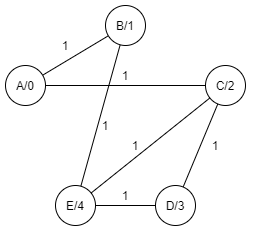
Example graph for the problem __Verification of delivery rounds management__.

In [1]:
V = (0, 1, 2, 3, 4)
E = (
    (0, 1, 1, 0, 0),
    (1, 0, 0, 0, 1),
    (1, 0, 0, 1, 1),
    (0, 0, 1, 0, 1),
    (0, 1, 1, 1, 0),
)
L = (0, 1, 2, 3, 4)
Cycle = (0, 1, 4, 3, 2, 0)

Here we will try to determine if the problem __Verification of delivery rounds management__ is in __NP-Complete__. For that we will first prove that the verification of this problem is in __NP__, then we will prove that this problem is in __NP-Difficult__.

The problem is in __NP__ because given a sequence of vertexes, we can check in polynomial time :

* That this sequence of vertexes is indeed a cycle (Complexity : O(N)).

In [2]:
def Verification_Cycle(cycle): 

    for i in range(len(cycle)-1):
        if cycle[i] == cycle[i+1]:
            return False

    if cycle[0] != cycle[len(cycle)-1]:
        return False

    return True

Is_Cycle = Verification_Cycle(Cycle)

if Is_Cycle:
    print("This points follow a cycle")
else:
    print("This points don't follow a cycle")

This points follow a cycle


* That this sequence of vertexes passes only once through each vertex of the list L (Complexity: O(N²)).

In [16]:
def Verification_Vertex(cycle, L):
    Remaining_Vertex = list(L)
    Pass_Vertex = []

    for i in range(len(cycle)):
        for j in range(len(Remaining_Vertex)):
            if cycle[i] == Remaining_Vertex[j]:
                Remaining_Vertex.pop(j)
                Pass_Vertex.append(cycle[i])
                break

    if any(Pass_Vertex.count(element) > 1 for element in Pass_Vertex):
        return False
                
    if len(Remaining_Vertex) != 0:
        return False
    
    return True

Pass_All_Vertex = Verification_Vertex(Cycle, L)

if Pass_All_Vertex:
    print("This cycle pass through all vertexes defined in the liste L only once")
else:
    print("This cycle don't pass through all vertexes defined in the liste L only once")

This cycle pass through all vertexes defined in the liste L only once


* That the cost of the sequence is under k (Complexity: O(N)).

In [6]:
def Verification_K(cycle, E, k):
    sum_Edge = 0
    
    for i in range(len(cycle)-1):
        sum_Edge += E[cycle[i]][cycle[i+1]]
    
    if sum_Edge < k:
        return True
    else:
        return False
    
k = 6
Its_Lower = Verification_K(Cycle, E, k)

if Its_Lower:
    print("Cycle cost is under k")
else:
    print("Cycle cost is over k")

Cycle cost is under k


We will make a reduction from the __Hamiltonian Cycle__ problem. Since we know that the __Hamiltonian Cycle__ is __NP-Complete__, we will prove here that the __Verification of delivery round management__ is at least as difficult.

To do so, we will find a way to transform, in polynomial time, an instance of __Hamiltonian Cycle__ into an instance of __Verification of delivery round management__, so that both instances admit the same answer.

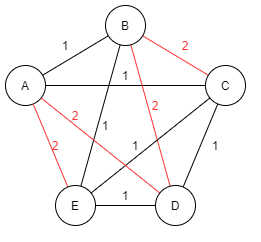

Example graph for the problem __Verification of delivery round management__ and the __Hamiltonian Cycle__.

__Ihc__ is an instance of __Hamiltonian Cycle__, consisting of the graph G=(V,E).

__Ivdrm__ is an instance of __Verification of delivery round management__ defined by:
* The edge-valued graph G '=(V, E(G )+E(G ̅), v : E(G )+E(G ̅) ↦ ℕ) with v(u)=1 ∀ u ∈ E(G ) and v(u)=2 ∀ u ∈ E(G ̅)
* The list of vertexes L=V
* The integer k=|V |-1

The instance __Ihc__ is built in polynomial time: Finding all combinations of vertexes of L not present in G is done in O(|V |²)

Suppose that there exists an algorithm solving the problem __Verification of delivery round management__ in polynomial time.

By applying this algorithm on __Ivdrm__ :
* Either we get the answer yes, the length of the cycle is less than k. In this case, we know that there is a Hamiltonian cycle in G. Indeed, the solution of __Ivdrm__ is a cycle of length |V |-1 by construction of __Ivdrm__. This cycle can only pass through edges of G, since those of G ̅ have cost 2, the length of this solution would be greater than |V |-1. Moreover, this solution passes only once through each vertex, since otherwise its length would be greater than |V |-1. Furthermore, since each vertex of G is in the list L and this cycle passes through each vertex of G, then this cycle passes through all the vertexes of the list L. This cycle is therefore a Hamiltonian cycle in G, so the answer to __Ihc__ is yes.
* Symmetrically, if the answer is no, we deduce that there is no Hamiltonian cycle in G, because otherwise it would constitute a solution to __Ivdrm__ and the answer would be yes.

Thus, we can do a polynomial reduction from the __Hamiltonian Cycle__ to the __Verification of delivery round management__, which proves that __Verification of delivery round management__ is at least as difficult as __Hamiltonian Cycle__. And since we know that __Hamiltonian Cycle__ is in __NP-Complete__, then we can determine that __Delivery Route Management Verification__ is in __NP-Difficult__.

Finally as __Verification of delivery round management__ is in both __NP__ and __NP-Difficult__, we can conclude that it is at the union of both sets. So __Verification of delivery round management__ is in __NP-Complete__.

2. __Conclusion__

We have seen that the verification of our problem is not solvable in polynomial time. We can therefore deduce that __Delivery rounds management__ is not solvable in polynomial time, and therefore is in __NP-Difficult__.

## Formal presentation of data

For representing graph in our algorithm we are going to use an adjacency matrix, but not a normal one. For creating our graph, we decide to ban loop and multiple edges between two points, because went you seach the shortest path between two points a loop will always add useless length, and between multipule path we will always pick the shortest. 

So because of this simplification, insted of counting the number of connection between vertexes (because it will always be 1) inside the matrix, we will put the weight of this connection. And when there is no connections, the value will be 0.

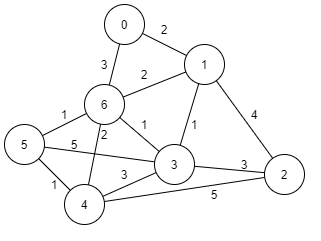
Exemple Graph

So the matrix will look like this for this exemple graph.

In [10]:
matrix = (
    (0, 2, 0, 0, 0, 0, 3),
    (2, 0, 4, 1, 0, 0, 2),
    (0, 4, 0, 3, 4, 0, 0),
    (0, 1, 3, 0, 3, 5, 1),
    (0, 1, 5, 3, 0, 1, 2),
    (0, 0, 0, 5, 1, 0, 1),
    (3, 2, 0, 1, 2, 5, 0),
)

## Operational research

### Problem modeling

1. __Program decision variables__

Given that the Hamiltonian cycle is described by $N²$ variable $X_{i,R}$, where :
- $i$ = the vertex
- $R$ = the rank of the vertex in a cycle.
The decision variable $P$ has a state equal to 1 if the truck takes the road on node $i$ at rank $R$.

Thus program decision variable is :<br>
    
 $$X_{i,R} \text {: State matrix} $$<br>
 
This matrix will allow us to know where the truck passed previously and what will be its next stop.

Exemple of state matrix :
<br>
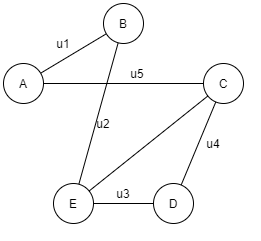

| i \ P | 1 | 2 | 3 | 4 | 5 | 6 |
|-------|---|---|---|---|---|---|
|   A   | 1 | 0 | 0 | 0 | 0 | 1 |
|   B   | 0 | 1 | 0 | 0 | 0 | 0 |
|   C   | 0 | 0 | 0 | 0 | 1 | 0 |
|   D   | 0 | 0 | 0 | 1 | 0 | 0 |
|   E   | 0 | 0 | 1 | 0 | 0 | 0 |

2. __Objective function__

The objective function is:
    $$Min: \sum_{n=1,m=1}^{i,j} M_{n,m} \sum_{r=1}^P X_{n,r}X_{m,r+1} $$ 

3. __Program Constraints__

In our situation, we have to follow several constraints. 
- The delivery truck can only be at one location at a time, the sum of the states per column of $X_{i,R}$ is therefore always equal to 1. 
- The truck must pass through a city once and only once.
- The truck must use an existing road
- The delivery round must end where it started
- The state matrix has only 2 possible values 1 or 0

The mathematical representation of these constraints is the following:

$$C.S:\left\{
    \begin{array}{ll}
        \sum_{c=1}^i X_{cp} = 1 \space \forall \text{ } p \space : \text{The truck can only be at one city at the time}\\
        \sum_{p=1}Pi X_{cp} = 1 \space \forall \text{ } c \space : \text{The truck can pass only once through each vertex} \\
        \prod_{r=1}^P \sum_{n=1,m=1}^{i,j} M_{n,m} * X_{n,r}X_{m,r+1} \gt 0  \space : \text{The must follow an existing road}\\
        X_{c1} = X_{cP} \text{ } \forall \text{ } c \in [1,i] \space : \text{The delevery tour end where it started}\\
        X_{c,p} \in \{0,1\} \text{ } \forall \text{ } c,p \in [1,i] \space : \text{State value of matrix can only be 1 or 0}
    \end{array}
\right.$$

With : 
$$
i:\text{ The vertex}\\
P:\text{ Solution state number}\\
i = j \\
M_{ij} :\text{ Weight matrix of the situation (see in formal presentation of data)}
$$

## Bibliography

### Complexity

- https://fr.wikipedia.org/wiki/NP_(complexit%C3%A9)
- https://www.labri.fr/perso/betrema/MC/MC8.html
- https://fr.wikipedia.org/wiki/Probl%C3%A8me_du_voyageur_de_commerce
- https://fr.wikipedia.org/wiki/Graphe_hamiltonien
- https://www.fil.univ-lille.fr/~tison/AAC/C17/C10.pdf
- http://www.lix.polytechnique.fr/~bournez/cours/CoursDEAComplexite/00-N-Motivation-Theorie-Complexite.pdf

### Data modelisation

- https://fr.wikipedia.org/wiki/Matrice_d%27adjacence
- https://www.pairform.fr/doc/1/32/180/web/co/Liste.html
- https://fr.wikipedia.org/wiki/Liste_d%27adjacence

### Operational research

- http://www.sietmanagement.fr/decision-mathematique-la-rationalite-calculatoire-recherche-operationnelle-apprentissage-automatique
- https://educnet.enpc.fr/file.php/297/CoursROPonts.pdf
- https://qiskit.org/documentation/stable/0.24/locale/fr_FR/tutorials/optimization/6_examples_max_cut_and_tsp.html
- https://www.iro.umontreal.ca/~bastin/Cours/IFT1575/IFT1575.pdf
- http://ressources.aunege.fr/nuxeo/site/esupversions/2b1c56b6-109d-488a-94a3-3ea525f8beef/ModAidDec/cours/l7/l7.pdf
- https://fr.wikipedia.org/wiki/Recherche_op%C3%A9rationnelle
- https://fr.wikipedia.org/wiki/Fonction_objectif?tableofcontents=0
